In [17]:
# Importing Libraries

import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import fashion_mnist

In [18]:
# Load the Fashion-MNIST dataset
(x_train, y_train), (_, _) = fashion_mnist.load_data()

# Preprocess the data [Normalising the pixel values]
x_train = x_train.reshape(-1, 784) / 255.0

In [19]:
# Autoencoder model architecture

input_layer = Input(shape=(784,))
encoder = Dense(128, activation='relu')(input_layer)
encoder = Dense(64, activation='relu')(encoder)
encoder = Dense(32, activation='relu')(encoder)  # Lower-dimensional representation
decoder = Dense(64, activation='relu')(encoder)
decoder = Dense(128, activation='relu')(decoder)
decoder = Dense(784, activation='sigmoid')(decoder)

autoencoder = Model(input_layer, decoder)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


In [20]:
# Training the autoencoder model
autoencoder.fit(x_train, x_train, epochs=10, batch_size=256)

# Using the encoder part of the autoencoder to obtain lower-dimensional representations
encoder_model = Model(input_layer, encoder)
encoded_images = encoder_model.predict(x_train)

# Dimensionality reduction to 2 dimensions using t-SNE
tsne = TSNE(n_components=2)
tsne_results = tsne.fit_transform(encoded_images)

Epoch 1/10
235/235 [==============================] - 11s 31ms/step - loss: 0.3737
Epoch 2/10
235/235 [==============================] - 5s 22ms/step - loss: 0.3097
Epoch 3/10
235/235 [==============================] - 4s 17ms/step - loss: 0.3020
Epoch 4/10
235/235 [==============================] - 7s 28ms/step - loss: 0.2979
Epoch 5/10
235/235 [==============================] - 6s 23ms/step - loss: 0.2948
Epoch 6/10
235/235 [==============================] - 4s 17ms/step - loss: 0.2924
Epoch 7/10
235/235 [==============================] - 4s 19ms/step - loss: 0.2903
Epoch 8/10
235/235 [==============================] - 5s 20ms/step - loss: 0.2886
Epoch 9/10
235/235 [==============================] - 4s 17ms/step - loss: 0.2870
Epoch 10/10
1875/1875 [==============================] - 10s 5ms/step


<ipython-input-21-86ed1edaf5a8>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=y_train, cmap=plt.cm.get_cmap("jet", 10), marker='o', alpha=0.6)


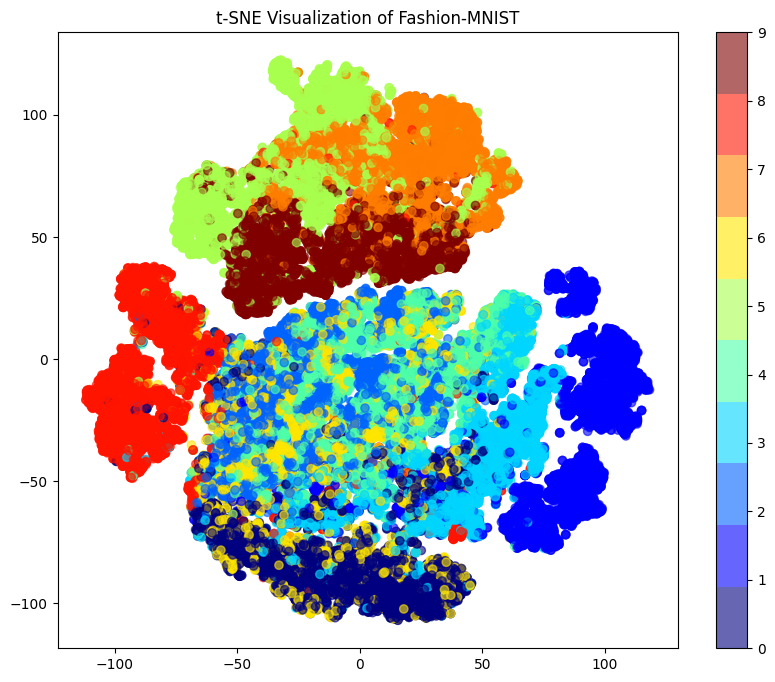

In [21]:
# Visualize the results
plt.figure(figsize=(10, 8))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=y_train, cmap=plt.cm.get_cmap("jet", 10), marker='o', alpha=0.6)
plt.colorbar(ticks=range(10))
plt.title('t-SNE Visualization of Fashion-MNIST')
plt.show()